<a href="https://colab.research.google.com/github/lilythomson13/PCA/blob/main/PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
import pandas as pd

drive.mount('/content/drive')

file_path = '/content/drive/My Drive/Phishing_Email.parquet'

df = pd.read_parquet(file_path)

print(df.head())


Mounted at /content/drive
   index  Unnamed: 0                                         Email Text  \
0      0           0  re : 6 . 1100 , disc : uniformitarianism , re ...   
1      1           1  the other side of * galicismos * * galicismo *...   
2      2           2  re : equistar deal tickets are you still avail...   
3      3           3  \nHello I am your hot lil horny toy.\n    I am...   
4      4           4  software at incredibly low prices ( 86 % lower...   

       Email Type  
0      Safe Email  
1      Safe Email  
2      Safe Email  
3  Phishing Email  
4  Phishing Email  


In [2]:
#Question 1

tokens_df=df['Email Text'].str.split()
tokens_df.head()

,Email Text
0,"[re, :, 6, ., 1100, ,, disc, :, uniformitarian..."
1,"[the, other, side, of, *, galicismos, *, *, ga..."
2,"[re, :, equistar, deal, tickets, are, you, sti..."
3,"[Hello, I, am, your, hot, lil, horny, toy., I,..."
4,"[software, at, incredibly, low, prices, (, 86,..."


In order to be able to clean the tokens to use them to predict whether the email is a phishing scam or not, I would start by turning all the tokens to lowercase to ensure consistency. Then, I would remove punctuation marks and remove words like "the," "and," or "of," and numbers since these words/characters really wouldn't have much predictive value since they could be present in both phishing and non-phishing emails at the same rate. Additionally, I would use the technique of "stemming," which reduces words to their base form to make analysis easier. I would then calculate the frequencies of the different words in the emails and then run a PCA analysis on them. This will reduce the dimensionality of the word frequency data and help classify patterns. Then, a machine learning model like random forest can be applied to predict whether an email is phishing or not.

In [9]:
#Question 2

import pickle
from collections import Counter

pickle_file_path = '/content/drive/My Drive/all_tokens.pickle'

with open(pickle_file_path, 'rb') as file:
    all_tokens = pickle.load(file)


from collections import Counter
token_count = Counter(all_tokens)
token_freq = token_count.most_common()

,count
count,48691.000000
mean,5.687889
std,27.717476
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,1365.000000


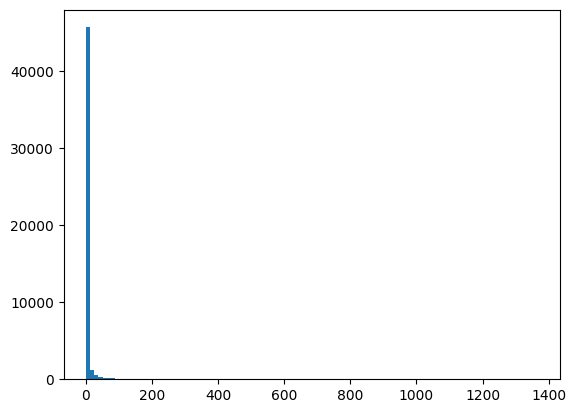

In [4]:
histogram = pd.DataFrame(token_freq,columns=['token','count'])
histogram['count'].hist(grid=False,bins=110)
histogram['count'].describe()

Looking at the histogram plotted with the occurences of tokens, we can see that there is a significantly large frequency of tokens that appear only one or two times, given that the 75th quartile is 2.0 times. However, there is a small frequency of tokens that have a very large occurence. The maximum value is 1365. This likely refers to words such a "the," "of," or other words that likely appear in most emails.

In [5]:
#Question 3

file_path_3='/content/drive/My Drive/Phishing_clean.parquet'
clean_df=pd.read_parquet(file_path_3)
clean_df.head()

,Email Type,new,date,get,please,enron,like,2002,would,one,...,ï¿½ï¿½,safety,yap,ypil,maintain,procedures,tip,elizabeth,leadership,italian
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

X=clean_df.drop('Email Type',axis=1)
y=clean_df['Email Type']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.2,random_state=120)

linear_regression=LinearRegression(fit_intercept=False)
linear_regression.fit(X_train, y_train)

y_test_pred=linear_regression.predict(X_test)
y_train_pred=linear_regression.predict(X_train)


training_r_squared=linear_regression.score(X_train, y_train)
testing_r_squared=linear_regression.score(X_test, y_test)
print('Training R^2: ', training_r_squared)
print('Test R^2: ', testing_r_squared)

Training R^2:  0.696247317787418
Test R^2:  -2.181437137846926e+22


The R^2 value of the training set is 0.696 and the R^2 value of the testing set is -2.181. Given the R^2 value of the training set, the performance is reasonably good, but the model did not perform well on the testing set. The R^2 value should be less than 1, and 1 or -1 at a maximum.

In [ ]:
import numpy as np

coef = pd.DataFrame({'variables':linear_regression.feature_names_in_ , 'value':linear_regression.coef_})
coef['abs'] = np.abs(coef['value'])
coef.sort_values('abs',ascending=False)

,variables,value,abs
74,"2002,",1.220497e+13,1.220497e+13
1014,8859,-8.298006e+12,8.298006e+12
340,2005,-5.779494e+12,5.779494e+12
915,300,5.171208e+12,5.171208e+12
1133,"19,",4.791183e+12,4.791183e+12
...,...,...,...
757,regards,2.517700e-04,2.517700e-04
752,processing,-2.136230e-04,2.136230e-04
2558,"09,",2.166366e-05,2.166366e-05
64,week,1.525879e-05,1.525879e-05


The elements that have the largest coefficients in absolute value are numbers, so these wouldn't be very predictive of if an email is phishing or not.

<Axes: >

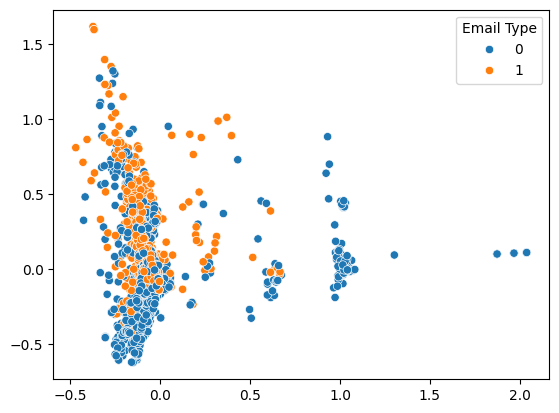

In [ ]:
#Question 4

## Implement PCA:
from sklearn.decomposition import PCA
import seaborn as sns

pca = PCA(n_components = 3)
pca = pca.fit(X_train)
Z_training = pca.transform(X_train)
Z_testing=pca.transform(X_test)

#plotting first 2 principal components
sns.scatterplot(x=Z_testing[:,0], y=Z_testing[:,1],hue=y_test)



The scatter plot is showing the first pricipal component on the x-axis and the second principal component on the y-axis. Since the orange dots are the phishing emails, we see that it has a higher second principal component and lower first principal component. The blue dots generally have a slightly lower second principal component and somewhat higher first principal component.

In [ ]:
#Question 5

pca_2 = PCA(n_components=2610).fit(X_train)
Z_train_2 = pca_2.transform(X_train)
Z_test_2 = pca_2.transform(X_test)

linear_regression_2=LinearRegression(fit_intercept=False)
linear_regression_2.fit(Z_train_2, y_train)

y_train_pred_2=linear_regression_2.predict(Z_train_2)
y_test_pred_2=linear_regression_2.predict(Z_test_2)

training_r_squared_2=linear_regression_2.score(Z_train_2, y_train)
testing_r_squared_2=linear_regression_2.score(Z_test_2, y_test)
print('Training R^2: ', training_r_squared_2)
print('Test R^2: ', testing_r_squared_2)


Training R^2:  0.12342072275942628
Test R^2:  0.03430630660661971


This performance is much worse than the linear regression for the training set, with an R^2 value that is 0.123, compared to 0.676 with the linear regression. However, the testing set R^2 value for PCA is giving a value that is in the range of 0 to 1, but it still is very close to 0, so not a great performance.

In [ ]:
#Question 6

Some advantages of using the principal components to run the high-dimensional regression is because it can reduce the overall dimensions of the dataset and turn the data into a smaller dataset of uncorrelated components. PCA is also used to focus on the components that explain most of the variance in the data, and focus on this rather than other components that aren't as relevant. This can increase accuracy and efficiency. However, since these dimensions are being reduced, we are essentially losing some components of the data that could be important for predicting outcomes. Also, a PCA model relies on linear relationships between components, so it may not be effective if this isn't the case in the dataset.  